In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
columns = ['CustomerID', 'Gender', 'Age', 'Annual Income','Spending Score']
df = pd.read_csv("Mall_Customers.csv")
df.columns = columns
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df["Gender"] = df.Gender.apply(lambda x: 0 if x == "Male" else 1)

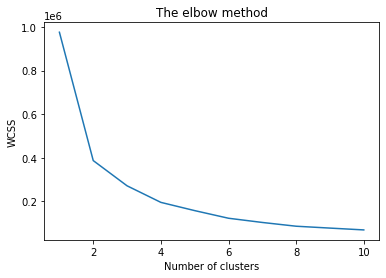

In [4]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=9)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# according to elbow method best value for K is 4

In [5]:
kmeans = KMeans(n_clusters=4,random_state=9)
y_kmeans = kmeans.fit_predict(df)

In [6]:
np.unique(y_kmeans)

array([0, 1, 2, 3])

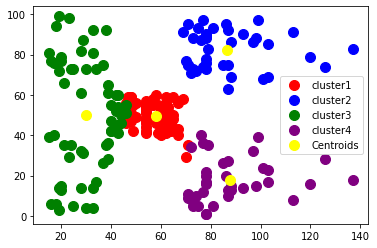

In [7]:
plt.scatter(df.iloc[y_kmeans == 0, 3], df.iloc[y_kmeans == 0, 4], s = 100, c = 'red', label = 'cluster1')
plt.scatter(df.iloc[y_kmeans == 1, 3], df.iloc[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'cluster2')
plt.scatter(df.iloc[y_kmeans == 2, 3], df.iloc[y_kmeans == 2, 4], s = 100, c = 'green', label = 'cluster3')
plt.scatter(df.iloc[y_kmeans == 3, 3], df.iloc[y_kmeans == 3, 4], s = 100, c = 'purple', label = 'cluster4')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:,4], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [8]:
df["Annual Income"].describe() # third feature

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income, dtype: float64

In [9]:
df["Spending Score"].describe() # fourth feature

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score, dtype: float64